<a href="https://colab.research.google.com/github/judithlambersend/Machine_Learning_TP4/blob/main/Machine_Learning_TP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Machine Learning TP4
# Classe 2B
# Judith Lambersend, Joseph Coste, Romain Broet

In [21]:
import os
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

from tensorflow.keras.preprocessing.image import ImageDataGenerator


from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.layers import Dense, Flatten, Dropout

from tensorflow.keras import Model
import seaborn as sns

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
%cd /content/drive/MyDrive/Machine_Learning/train

/content/drive/MyDrive/Machine_Learning/train


In [11]:
# On compte le nombres d'images
class_names = ['cats', 'dogs']
num_images = Counter()

for class_name in class_names:
    class_path = os.path.join('/content/drive/MyDrive/Machine_Learning/train', class_name)
    num_images[class_name] = len(os.listdir(class_path))

print(num_images)

Counter({'cats': 279, 'dogs': 278})


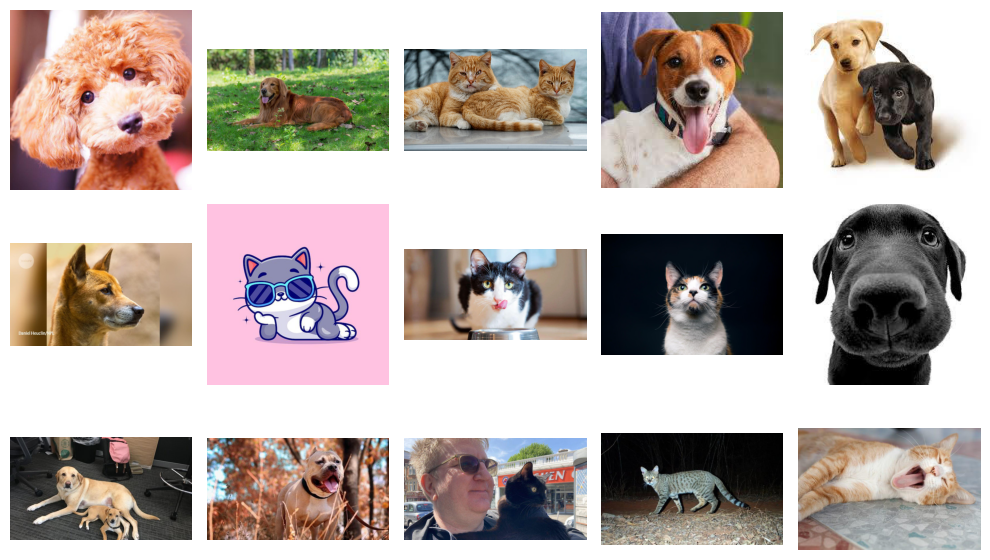

In [12]:
# Affiche les images pour être sûr qu'on peut les lire correctement 

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(10, 6))
axes = axes.flatten()

for i in range(len(axes)):
    class_name = np.random.choice(class_names)
    class_path = os.path.join('/content/drive/MyDrive/Machine_Learning/train', class_name)
    img_path = os.path.join(class_path, np.random.choice(os.listdir(class_path))) # on choisi aléatoirement entre chiens et chats 
    img = plt.imread(img_path)
    axes[i].imshow(img)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Load pre trained CNN
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(300, 300, 3))


In [ ]:
# Freeze all layers of the pre-trained model
for layer in resnet_model.layers:
    layer.trainable = False

In [ ]:
x = resnet_model.output
x = Flatten()(x)
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
predictions = Dense(2, activation='softmax', kernel_initializer='random_uniform')(x)


In [13]:
# TRAIN & TEST

data_dir = '/content/drive/MyDrive/Machine_Learning/train'
test_dir = '/content/drive/MyDrive/Machine_Learning/test'

train_datagen =  ImageDataGenerator(
    validation_split=0.15,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    preprocessing_function=preprocess_input,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


train_generator = train_datagen.flow_from_directory(
        data_dir,
        target_size=(300, 300),
        batch_size=16,
        shuffle=True)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(300, 300), # img_height, img_width
        batch_size=16,
        shuffle=False)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(300, 300),
    batch_size=16,
    subset='validation'
)

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.
Found 82 images belonging to 2 classes.


In [ ]:
# Build model
model = Model(inputs=resnet_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# fit model

history = model.fit(train_generator,epochs=10,validation_data=validation_generator,verbose = 1)



Epoch 1/10
35/35 [==============================] - 270s 8s/step - loss: 1.4008 - accuracy: 0.8761 - val_loss: 0.3628 - val_accuracy: 0.9634
Epoch 2/10
35/35 [==============================] - 273s 8s/step - loss: 0.2339 - accuracy: 0.9479 - val_loss: 0.0255 - val_accuracy: 0.9878
Epoch 3/10
35/35 [==============================] - 272s 8s/step - loss: 0.0906 - accuracy: 0.9785 - val_loss: 0.0630 - val_accuracy: 0.9756
Epoch 4/10
35/35 [==============================] - 284s 8s/step - loss: 0.0894 - accuracy: 0.9785 - val_loss: 0.0904 - val_accuracy: 0.9878
Epoch 5/10
35/35 [==============================] - 302s 9s/step - loss: 0.0907 - accuracy: 0.9803 - val_loss: 0.0597 - val_accuracy: 0.9756
Epoch 6/10
35/35 [==============================] - 311s 9s/step - loss: 0.0332 - accuracy: 0.9892 - val_loss: 0.0123 - val_accuracy: 0.9878
Epoch 7/10
35/35 [==============================] - 278s 8s/step - loss: 0.0319 - accuracy: 0.9946 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 8/10
35

In [ ]:
# ACCURACY

test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('Test accuracy:', test_acc)

9/9 - 75s - loss: 0.5504 - accuracy: 0.9214 - 75s/epoch - 8s/step
Test accuracy: 0.9214285612106323


In [ ]:
# CONFUSION MATRIX

from sklearn.metrics import confusion_matrix

# Get predictions on the test set
y_pred = model.predict(test_generator)

# Convert predictions from probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# Get true labels for the test set
y_true = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print confusion matrix
print(cm)

9/9 [==============================] - 53s 6s/step
[[60 10]
 [ 1 69]]


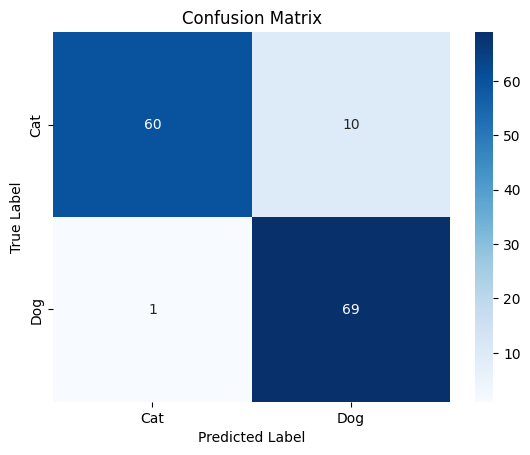

In [ ]:
# Plot the confusion matrix

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

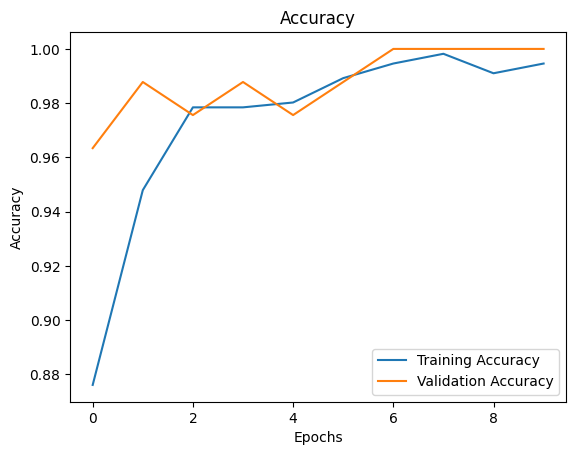

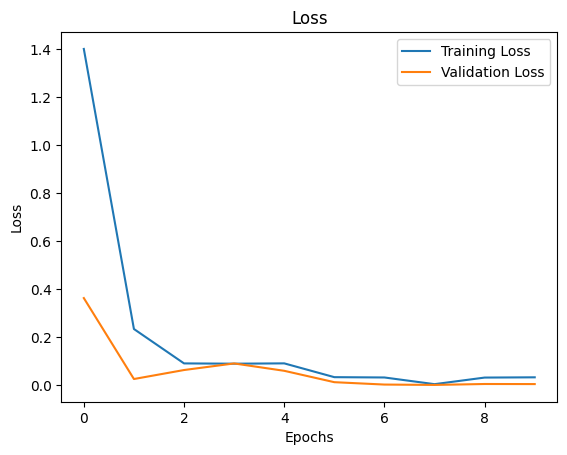

In [ ]:
# ACCURACY AND LOSS CURVES

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# plot accuracy
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# plot loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# PRINT METRICS

from sklearn.metrics import classification_report

# Predictions on the test set
y_pred = model.predict(test_generator)

y_pred = np.argmax(y_pred, axis=1)

# Get true labels for the test set
y_true = test_generator.classes

# Print classification report
report = classification_report(y_true, y_pred, target_names=test_generator.class_indices)
print(report)

9/9 [==============================] - 52s 6s/step
              precision    recall  f1-score   support

        cats       0.98      0.86      0.92        70
        dogs       0.87      0.99      0.93        70

    accuracy                           0.92       140
   macro avg       0.93      0.92      0.92       140
weighted avg       0.93      0.92      0.92       140



In [1]:
# REPEAT THE STEP 1 WITH ANOTHER MODEL

from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

In [2]:
# Load pre trained CNN
mobile_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

9406464/9406464 [==============================] - 0s 0us/step


In [4]:
# Freeze all layers of the pre-trained model
for layer in mobile_model.layers:
    layer.trainable = False

In [14]:
x = mobile_model.output
x = Flatten()(x)
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
predictions = Dense(2, activation='softmax', kernel_initializer='random_uniform')(x)

In [15]:
# Build model
model = Model(inputs=mobile_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
# fit model

history = model.fit(train_generator,epochs=10,validation_data=validation_generator,verbose = 1)

Epoch 1/10
35/35 [==============================] - 106s 3s/step - loss: 1.1341 - accuracy: 0.6481 - val_loss: 0.4042 - val_accuracy: 0.8415
Epoch 2/10
35/35 [==============================] - 91s 3s/step - loss: 0.4008 - accuracy: 0.8151 - val_loss: 0.2691 - val_accuracy: 0.9146
Epoch 3/10
35/35 [==============================] - 78s 2s/step - loss: 0.2927 - accuracy: 0.8707 - val_loss: 0.2677 - val_accuracy: 0.8659
Epoch 4/10
35/35 [==============================] - 79s 2s/step - loss: 0.3039 - accuracy: 0.8671 - val_loss: 0.3466 - val_accuracy: 0.8293
Epoch 5/10
35/35 [==============================] - 76s 2s/step - loss: 0.2554 - accuracy: 0.8977 - val_loss: 0.1879 - val_accuracy: 0.9146
Epoch 6/10
35/35 [==============================] - 78s 2s/step - loss: 0.1805 - accuracy: 0.9282 - val_loss: 0.1541 - val_accuracy: 0.9390
Epoch 7/10
35/35 [==============================] - 72s 2s/step - loss: 0.1976 - accuracy: 0.9174 - val_loss: 0.2252 - val_accuracy: 0.9024
Epoch 8/10
35/35 [=

In [17]:
# ACCURACY

test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('Test accuracy:', test_acc)

9/9 - 35s - loss: 0.6316 - accuracy: 0.8000 - 35s/epoch - 4s/step
Test accuracy: 0.800000011920929


In [18]:
# CONFUSION MATRIX

from sklearn.metrics import confusion_matrix

# Get predictions on the test set
y_pred = model.predict(test_generator)

# Convert predictions from probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# Get true labels for the test set
y_true = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print confusion matrix
print(cm)

9/9 [==============================] - 14s 1s/step
[[53 17]
 [11 59]]


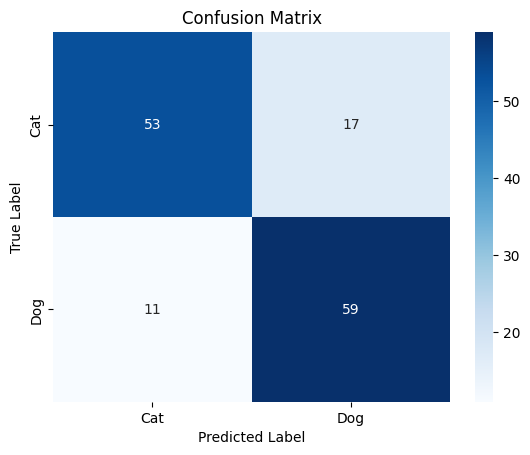

In [22]:
# Plot the confusion matrix

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

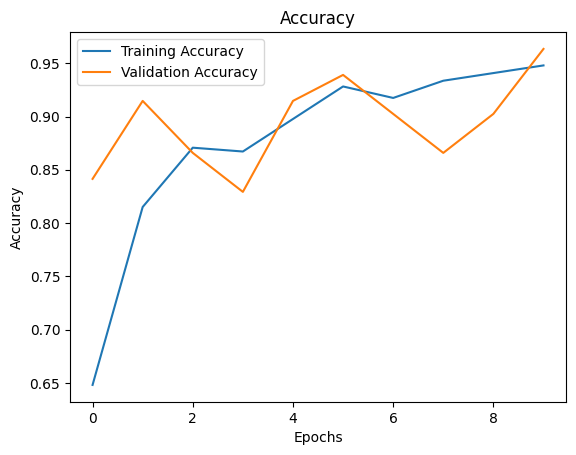

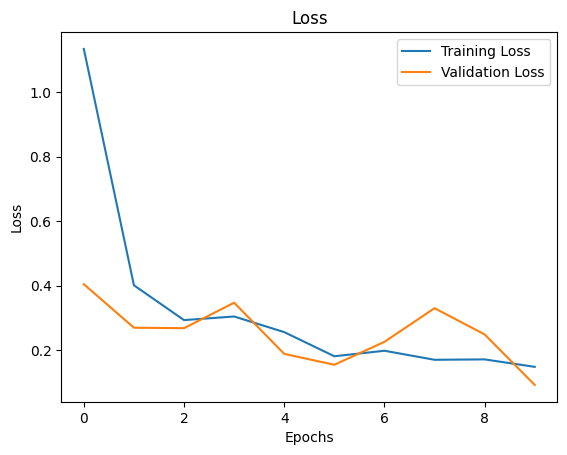

In [23]:
# ACCURACY AND LOSS CURVES

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# plot accuracy
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# plot loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
# PRINT METRICS

from sklearn.metrics import classification_report

# Predictions on the test set
y_pred = model.predict(test_generator)

y_pred = np.argmax(y_pred, axis=1)

# Get true labels for the test set
y_true = test_generator.classes

# Print classification report
report = classification_report(y_true, y_pred, target_names=test_generator.class_indices)
print(report)

9/9 [==============================] - 13s 1s/step
              precision    recall  f1-score   support

        cats       0.83      0.76      0.79        70
        dogs       0.78      0.84      0.81        70

    accuracy                           0.80       140
   macro avg       0.80      0.80      0.80       140
weighted avg       0.80      0.80      0.80       140



In [ ]:
# L'accuracy pour le modèle 2 est bien moins élevée que pour le modèle 1. On choisi donc le modèle 1.